In [40]:
using POMDPModels: SimpleGridWorld
using LinearAlgebra: I
using CommonRLInterface: render, actions, act!, observe, reset!, AbstractEnv, observations, terminated, clone
import POMDPTools
using SparseArrays
using Statistics: mean

# SARSA

In [56]:
function sarsa_episode!(Q, env; ϵ=0.10, γ=0.99, α=0.2)
    start = time()
    
    function policy(s)
        if rand() < ϵ
            return rand(actions(env))
        else
            return argmax(a->Q[(s, a)], actions(env))
        end
    end

    s = observe(env)
    a = policy(s)
    r = act!(env, a)
    sp = observe(env)
    hist = [s]

    while !terminated(env)
        ap = policy(sp)

        Q[(s,a)] += α*(r + γ*Q[(sp, ap)] - Q[(s, a)])

        s = sp
        a = ap
        r = act!(env, a)
        sp = observe(env)
        push!(hist, sp)
    end

    Q[(s,a)] += α*(r - Q[(s, a)])

    return (hist=hist, Q = copy(Q), time=time()-start)
end

sarsa_episode! (generic function with 1 method)

In [57]:
function sarsa!(env; n_episodes=100)
    Q = Dict((s, a) => 0.0 for s in observations(env), a in actions(env))
    episodes = []
    
    for i in 1:n_episodes
        reset!(env)
        push!(episodes, sarsa_episode!(Q, env;
                                       ϵ=max(0.1, 1-i/n_episodes)))
    end
    
    return episodes
end

sarsa! (generic function with 1 method)

In [58]:
m = SimpleGridWorld()
env = convert(AbstractEnv, m)

POMDPTools.CommonRLIntegration.MDPCommonRLEnv{AbstractArray, SimpleGridWorld, StaticArraysCore.SVector{2, Int64}}(SimpleGridWorld
  size: Tuple{Int64, Int64}
  rewards: Dict{StaticArraysCore.SVector{2, Int64}, Float64}
  terminate_from: Set{StaticArraysCore.SVector{2, Int64}}
  tprob: Float64 0.7
  discount: Float64 0.95
, [6, 8])

In [59]:
sarsa_episodes = sarsa!(env, n_episodes=10_000);

In [55]:
using Interact
@manipulate for episode in 1:length(sarsa_episodes), step in 1:maximum(ep->length(ep.hist), sarsa_episodes)
    ep = sarsa_episodes[episode]
    i = min(step, length(ep.hist))
    POMDPTools.render(m, (s=ep.hist[i],), color=s->maximum(map(a->ep.Q[(s,a)], actions(env))))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["episode"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 10000, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(5000), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/zach/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/zach/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/zach/.julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), Asset("css", nothing, "/home/zach/.julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), Asset("css", nothing, "/home/zach/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f949fa24180, Task (runnable) @0x00007f949fa24180), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\",\"43\",\"44\",\"45\",\"46\",\"47\",\"48\",\"49\",\"50\",\"51\",

# SARSA-λ

In [61]:
function sarsa_lambda_episode!(Q, env; ϵ=0.10, γ=0.99, α=0.05, λ=0.9)

    start = time()
    
    function policy(s)
        if rand() < ϵ
            return rand(actions(env))
        else
            return argmax(a->Q[(s, a)], actions(env))
        end
    end

    s = observe(env)
    a = policy(s)
    r = act!(env, a)
    sp = observe(env)
    hist = [s]
    N = Dict((s, a) => 0.0)

    while !terminated(env)
        ap = policy(sp)

        N[(s, a)] = get(N, (s, a), 0.0) + 1

        δ = r + γ*Q[(sp, ap)] - Q[(s, a)]

        for ((s, a), n) in N
            Q[(s, a)] += α*δ*n
            N[(s, a)] *= γ*λ
        end

        s = sp
        a = ap
        r = act!(env, a)
        sp = observe(env)
        push!(hist, sp)
    end

    N[(s, a)] = get(N, (s, a), 0.0) + 1
    δ = r - Q[(s, a)]

    for ((s, a), n) in N
        Q[(s, a)] += α*δ*n
        N[(s, a)] *= γ*λ
    end

    return (hist=hist, Q = copy(Q), time=time()-start)
end

sarsa_lambda_episode! (generic function with 1 method)

In [62]:
function sarsa_lambda!(env; n_episodes=100, kwargs...)
    Q = Dict((s, a) => 0.0 for s in observations(env), a in actions(env))
    episodes = []
    
    for i in 1:n_episodes
        reset!(env)
        push!(episodes, sarsa_lambda_episode!(Q, env;
                                              ϵ=max(0.01, 1-i/n_episodes),
                                              kwargs...))
    end
    
    return episodes
end

sarsa_lambda! (generic function with 1 method)

In [70]:
lambda_episodes = sarsa_lambda!(env, n_episodes=10000, α=0.1, λ=0.3);

In [71]:
using Interact
@manipulate for episode in 1:length(lambda_episodes), step in 1:maximum(ep->length(ep.hist), lambda_episodes)
    ep = lambda_episodes[episode]
    i = min(step, length(ep.hist))
    POMDPTools.render(m, (s=ep.hist[i],), color=s->maximum(map(a->ep.Q[(s,a)], actions(env))))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["episode"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 10000, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(5000), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/zach/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/zach/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/zach/.julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), Asset("css", nothing, "/home/zach/.julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), Asset("css", nothing, "/home/zach/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f94d15a85d0, Task (runnable) @0x00007f94d15a85d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\",\"43\",\"44\",\"45\",\"46\",\"47\",\"48\",\"49\",\"50\",\"51\",

# Learning curves

In [65]:
using Plots

In [66]:
function evaluate(env, policy, n_episodes=1000, max_steps=1000, γ=1.0)
    returns = Float64[]
    for _ in 1:n_episodes
        t = 0
        r = 0.0
        reset!(env)
        s = observe(env)
        while !terminated(env)
            a = policy(s)
            r += γ^t*act!(env, a)
            s = observe(env)
            t += 1
        end
        push!(returns, r)
    end
    return returns
end

evaluate (generic function with 4 methods)

In [67]:
episodes = Dict("SARSA"=>sarsa_episodes, "SARSA-λ"=>lambda_episodes)

Dict{String, Vector{Any}} with 2 entries:
  "SARSA-λ" => [(hist = StaticArraysCore.SVector{2, Int64}[[1, 8], [1, 8], [1, …
  "SARSA"   => [(hist = StaticArraysCore.SVector{2, Int64}[[10, 1], [10, 2], [9…

## By # Steps

x = total number of steps in env

y = average return

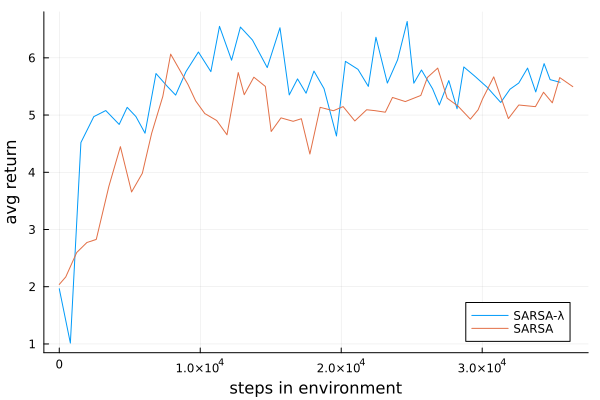

In [68]:
p = plot(xlabel="steps in environment", ylabel="avg return")
n = 20
stop = 1000
for (name, eps) in episodes
    Q = Dict((s, a) => 0.0 for s in observations(env), a in actions(env))
    xs = [0]
    ys = [mean(evaluate(env, s->argmax(a->Q[(s, a)], actions(env))))]
    for i in n:n:min(stop, length(eps))
        newsteps = sum(length(ep.hist) for ep in eps[i-n+1:i])
        push!(xs, last(xs) + newsteps)
        Q = eps[i].Q
        push!(ys, mean(evaluate(env, s->argmax(a->Q[(s, a)], actions(env)))))
    end    
    plot!(p, xs, ys, label=name)
end
p

## By wall clock time

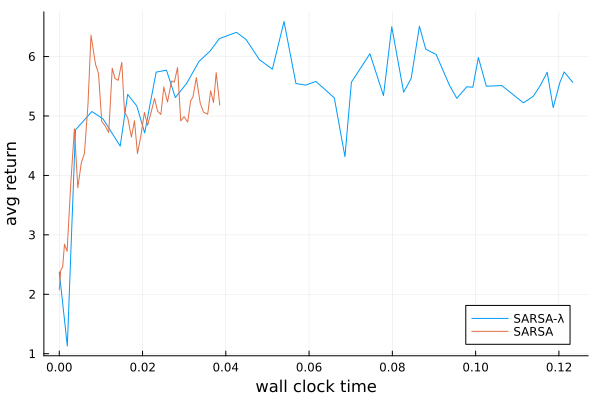

In [69]:
p = plot(xlabel="wall clock time", ylabel="avg return")
n = 20 
stop = 1000
for (name,eps) in episodes
    Q = Dict((s, a) => 0.0 for s in observations(env), a in actions(env))
    xs = [0.0]
    ys = [mean(evaluate(env, s->argmax(a->Q[(s, a)], actions(env))))]
    for i in n:n:min(stop, length(eps))
        newtime = sum(ep.time for ep in eps[i-n+1:i])
        push!(xs, last(xs) + newtime)
        Q = eps[i].Q
        push!(ys, mean(evaluate(env, s->argmax(a->Q[(s, a)], actions(env)))))
    end    
    plot!(p, xs, ys, label=name)
end
p